### Heart Disease Detection Project

In [1]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting

# for modelling
import sklearn
import imblearn


LOAD DATASET

In [2]:
# let's import the data
data = pd.read_csv('heart.csv')

# let's take a look at the data
pd.set_option('display.max_columns', None)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# let's check the shape of the dataset

print("shape of the dataset is ", data.shape)

shape of the dataset is  (1025, 14)


In [4]:
# let's get the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
print("thal unique",data.thal.unique())
print("ca unique",data.ca.unique())
print("slope unique",data.slope.unique())
print("exang unique",data.exang.unique())
print("restecg unique",data.restecg.unique())
print("fbs unique",data.fbs.unique())
print("cp unique",data.cp.unique())
print("trestbps unique",data.trestbps.unique())
print("chol unique",data.chol.unique())
print("thalach unique",data.thalach.unique())
print("oldpeak unique",data.oldpeak.unique())

thal unique [3 2 1 0]
ca unique [2 0 1 3 4]
slope unique [2 0 1]
exang unique [0 1]
restecg unique [1 0 2]
fbs unique [0 1]
cp unique [0 1 2 3]
trestbps unique [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol unique [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
thalach un

In [7]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


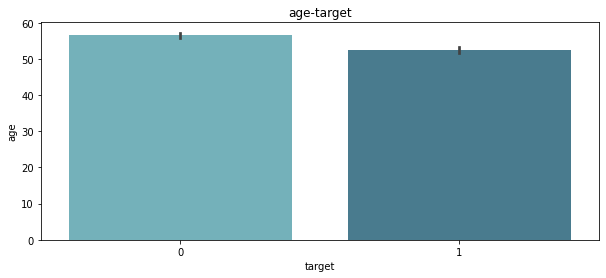

In [8]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'target', y = 'age', data = data, palette= 'GnBu_d').set_title('age-target')
plt.xticks
plt.show()

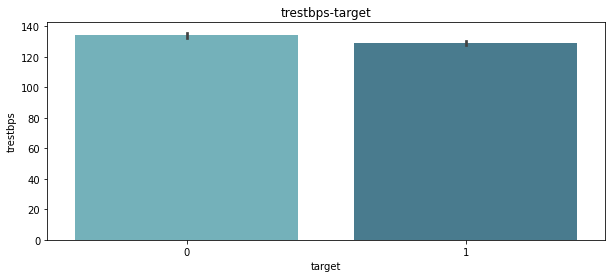

In [9]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'target', y = 'trestbps', data = data, palette= 'GnBu_d').set_title('trestbps-target')
plt.xticks
plt.show()

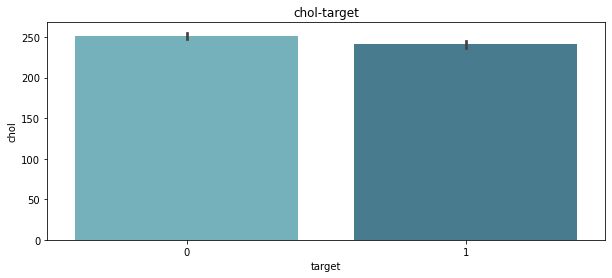

In [10]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'target', y = 'chol', data = data, palette= 'GnBu_d').set_title('chol-target')
plt.xticks
plt.show()

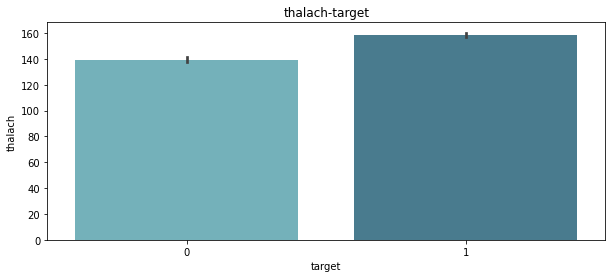

In [11]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'target', y = 'thalach', data = data, palette= 'GnBu_d').set_title('thalach-target')
plt.xticks
plt.show()

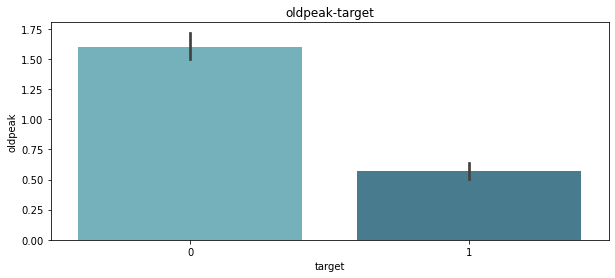

In [12]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'target', y = 'oldpeak', data = data, palette= 'GnBu_d').set_title('oldpeak-target')
plt.xticks
plt.show()

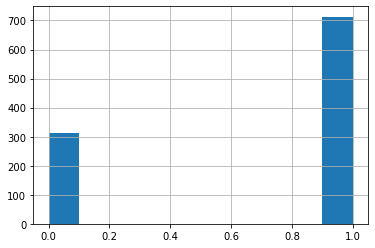

In [13]:
data['sex'].hist()

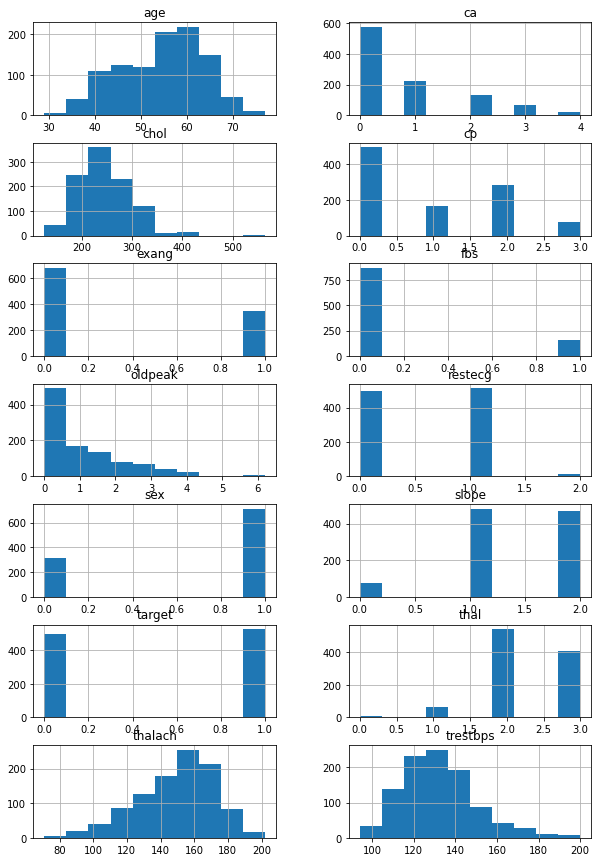

In [14]:
# Lets have such of an histogram for every attribute:
fig, axis = plt.subplots(7,2,figsize=(10, 15))
data.hist(ax=axis)
plt.show()

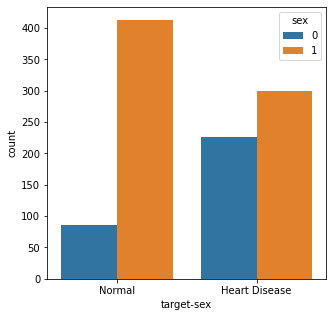

In [15]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = data['target'].apply(lambda x:'Heart Disease' if x == 1 else 'Normal'), hue=data['sex'])
ax.set_xlabel('target-sex')
plt.show()

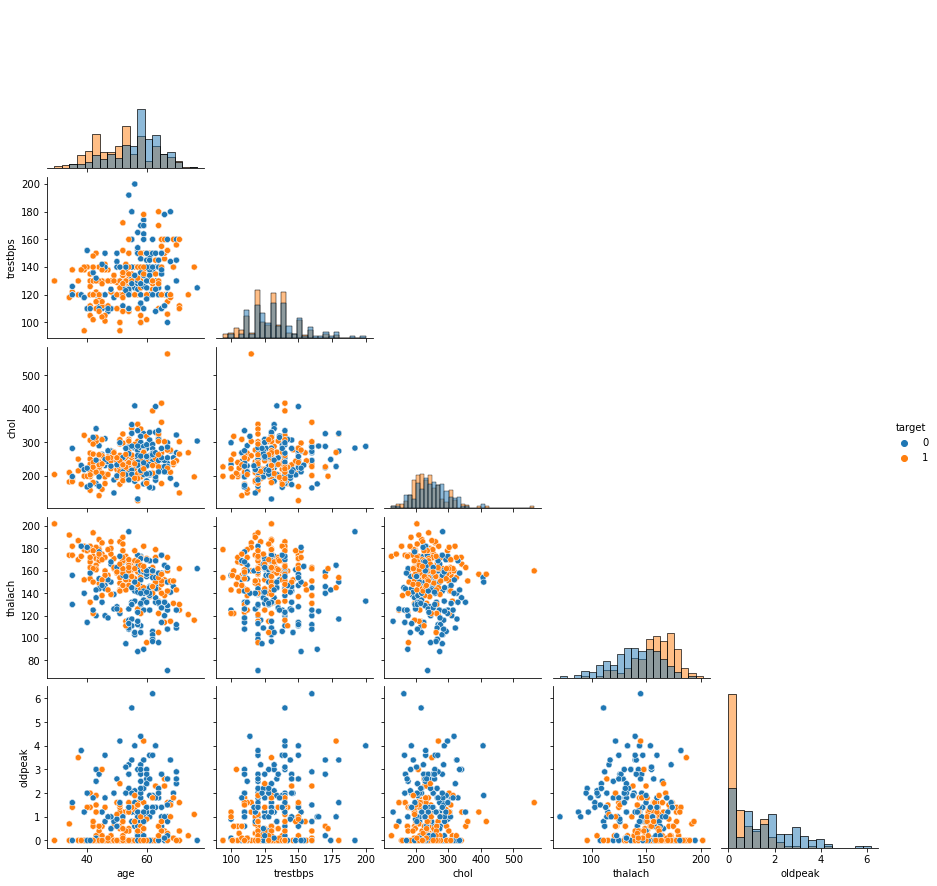

In [16]:
columns=['age','trestbps','chol','thalach','oldpeak','target']#selecting columns
sns.pairplot(data[columns],hue='target',corner=True,diag_kind='hist')

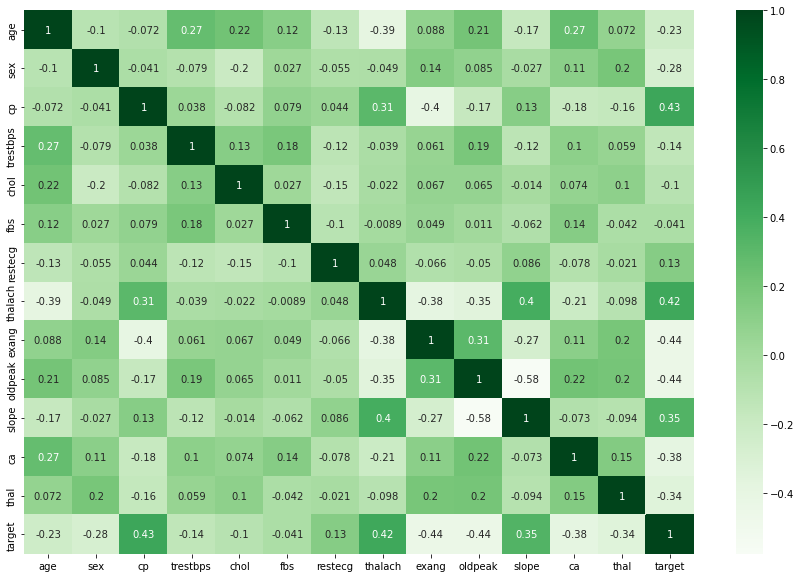

In [17]:
df = data
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

In [18]:
from scipy.stats import zscore
df = data
#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(1025, 14)
(980, 14)


In [19]:
df_1.skew()


age        -0.231808
sex        -0.884861
cp          0.539401
trestbps    0.557830
chol        0.264843
fbs         2.009066
restecg     0.172709
thalach    -0.520611
exang       0.687158
oldpeak     0.945998
slope      -0.465616
ca          1.169360
thal       -0.503175
target     -0.061347
dtype: float64

In [20]:
from scipy.stats import boxcox
for col in df:
    if df[col].skew()>=.50:
        df[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation


In [21]:
x =df_1.drop('target',axis=1)
y =df_1['target']

In [22]:
from sklearn.preprocessing import StandardScaler # To fit all data on same scale
from sklearn.model_selection import train_test_split # To split data in 2 parts
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [24]:
df_1['target'].unique()

array([0, 1], dtype=int64)

In [25]:
yes_decease = df_1[df_1['target']==1]
no_deceases = df_1[df_1['target']==0]
yes_decease.shape,no_deceases.shape

((505, 14), (475, 14))

In [26]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(sampling_strategy='auto')
x,y = nm.fit_sample(x,y)

In [27]:
x.shape, y.shape

((950, 13), (950,))

In [28]:
STD=StandardScaler()
x=STD.fit_transform(x)

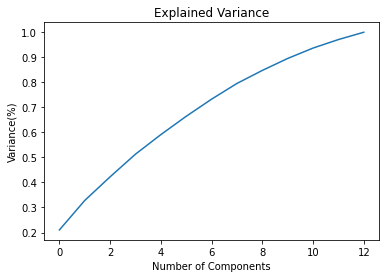

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lg=LogisticRegression()
svc=SVC()
rndf = RandomForestClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
knn=KNeighborsClassifier()
sgdc = SGDClassifier()

In [31]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)
    
    
    plt.rcParams['figure.figsize'] = (5, 5)
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm, annot = True, cmap = 'copper')
    plt.show()

Accuracy Score 84.08163265306122
Confusion Matrix
 [[ 98  31]
 [  8 108]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.76      0.83       129
           1       0.78      0.93      0.85       116

    accuracy                           0.84       245
   macro avg       0.85      0.85      0.84       245
weighted avg       0.85      0.84      0.84       245

F1 score 84.70588235294119


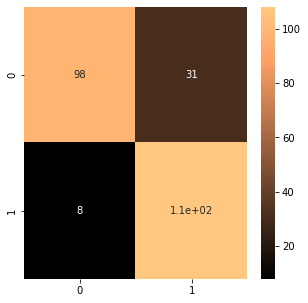

In [32]:
fun(lg)

Accuracy Score 68.9795918367347
Confusion Matrix
 [[77 52]
 [24 92]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.60      0.67       129
           1       0.64      0.79      0.71       116

    accuracy                           0.69       245
   macro avg       0.70      0.70      0.69       245
weighted avg       0.70      0.69      0.69       245

F1 score 70.76923076923076


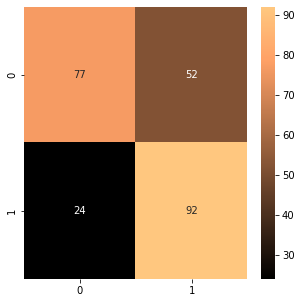

In [33]:
fun(svc)

Accuracy Score 100.0
Confusion Matrix
 [[129   0]
 [  0 116]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       116

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

F1 score 100.0


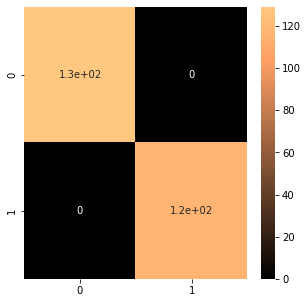

In [34]:
fun(dtc)

Accuracy Score 82.85714285714286
Confusion Matrix
 [[100  29]
 [ 13 103]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       129
           1       0.78      0.89      0.83       116

    accuracy                           0.83       245
   macro avg       0.83      0.83      0.83       245
weighted avg       0.84      0.83      0.83       245

F1 score 83.06451612903226


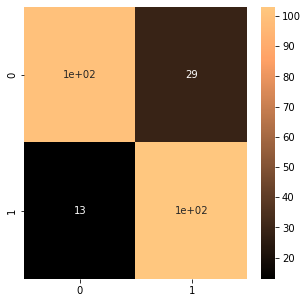

In [35]:
fun(gb)

Accuracy Score 74.28571428571429
Confusion Matrix
 [[97 32]
 [31 85]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       129
           1       0.73      0.73      0.73       116

    accuracy                           0.74       245
   macro avg       0.74      0.74      0.74       245
weighted avg       0.74      0.74      0.74       245

F1 score 72.96137339055794


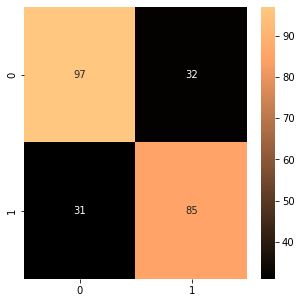

In [36]:
fun(knn)

Accuracy Score 55.51020408163265
Confusion Matrix
 [[129   0]
 [109   7]]
Classification Report
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       129
           1       1.00      0.06      0.11       116

    accuracy                           0.56       245
   macro avg       0.77      0.53      0.41       245
weighted avg       0.76      0.56      0.42       245

F1 score 11.382113821138212


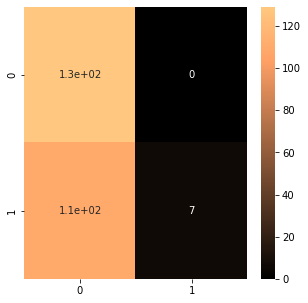

In [37]:
fun(sgdc)

ENSAMBLE TECHNIQUE

Accuracy Score 100.0
Confusion Matrix
 [[129   0]
 [  0 116]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       116

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

F1 score 100.0


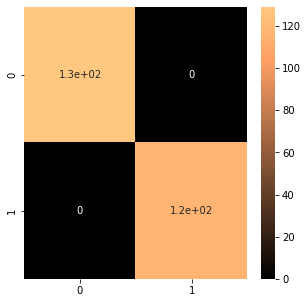

In [38]:
fun(rndf)
pred=rndf.predict(x_test)

In [39]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()

Accuracy Score 90.20408163265307
Confusion Matrix
 [[115  14]
 [ 10 106]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       129
           1       0.88      0.91      0.90       116

    accuracy                           0.90       245
   macro avg       0.90      0.90      0.90       245
weighted avg       0.90      0.90      0.90       245

F1 score 89.83050847457628


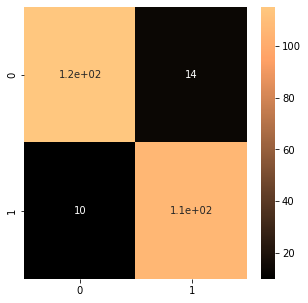

In [40]:
fun(ad)
pred=ad.predict(x_test)

Accuracy Score 96.73469387755102
Confusion Matrix
 [[126   3]
 [  5 111]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       129
           1       0.97      0.96      0.97       116

    accuracy                           0.97       245
   macro avg       0.97      0.97      0.97       245
weighted avg       0.97      0.97      0.97       245

F1 score 96.52173913043478


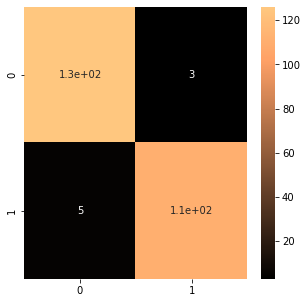

In [41]:
fun(gd)
pred=gd.predict(x_test)

In [42]:
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=5)
print("score of cross validation score for Decisiontreeclassifier",score.mean()*100)
score=cross_val_score(knn,x,y,cv=5)
print("score of cross validation score for knn",score.mean()*100)
score=cross_val_score(gb,x,y,cv=5)
print("score of cross validation score for GausianNB classifier",score.mean()*100)
score=cross_val_score(rndf,x,y,cv=4)
print("score of cross validation score for Randomforest classifier",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for Adaboost classifier',score.mean()*100)
score=cross_val_score(gd,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)

score of cross validation score for svc 87.15789473684211
score of cross validation score for Decisiontreeclassifier 89.36842105263156
score of cross validation score for knn 80.31578947368422
score of cross validation score for GausianNB classifier 82.63157894736842
score of cross validation score for Randomforest classifier 90.21203418076091
score of cross validation score for Adaboost classifier 85.67794206290111
score of cross validation score for Gradientboost classifier 86.84093890720845


In [43]:
grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,50,3),
    'min_samples_leaf' : range(1,30,2),
    'min_samples_split' : range(2,40,2),
    'splitter' : ['best','random']
}


grid_search = GridSearchCV(estimator = dtc,
                     param_grid = grid_param,
                     cv = 5,
                     n_jobs =-1)

grid_search.fit(x_train,y_train)


best_parameters = grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 38, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


0.9768707482993196

In [44]:
dtc1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 32, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc1.fit(x_train,y_train)

dtc1.score(x_test,y_test)

0.9877551020408163

GRADIENTBOOSTING HYPER PARAMETER TUNING

In [45]:
gd1 = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

grid_search = GridSearchCV(estimator = gd1,
                     param_grid = parameters,
                     cv = 5,
                     n_jobs =-1)

grid_search.fit(x_train,y_train)


best_parameters = grid_search.best_params_
print(best_parameters)


{'learning_rate': 1, 'max_depth': 7, 'n_estimators': 50}


In [46]:
gd1 = GradientBoostingClassifier(n_estimators= 500, max_depth= 10, learning_rate= 0.1)
gd1.fit(x_train,y_train)

gd1.score(x_test,y_test)

1.0

RANDOM FOREST CLASSIFIER HYPER PARAMETER TUNING


In [47]:
p2={'n_estimators':[10,50,100,250,500],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
rf1=GridSearchCV(rndf,p2)
rf1.fit(x,y)
print(rf1.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}


Accuracy Score 98.77551020408163
Confusion Matrix
 [[129   0]
 [  3 113]]
Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       129
           1       1.00      0.97      0.99       116

    accuracy                           0.99       245
   macro avg       0.99      0.99      0.99       245
weighted avg       0.99      0.99      0.99       245

F1 score 98.68995633187774


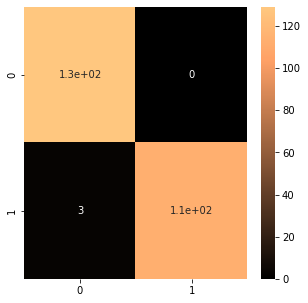

In [48]:
rndf1=RandomForestClassifier(max_depth=100,max_features='auto',n_estimators=10)
fun(rndf1)

In [49]:
score=cross_val_score(dtc1,x,y,cv=4)
print("score of cross validation score for DecisonTreeclassifier",score.mean()*100)
score=cross_val_score(gd1,x,y,cv=4)
print('score of cross validation score for GradientBoostingClassifier',score.mean()*100)
score=cross_val_score(rndf1,x,y,cv=4)
print("score of cross validation score for RandomForestClassifier",score.mean()*100)

score of cross validation score for DecisonTreeclassifier 85.79184838492358
score of cross validation score for GradientBoostingClassifier 85.78608658653334
score of cross validation score for RandomForestClassifier 89.05302627380067


In [50]:
estimator=[]

estimator.append(('rndf1',RandomForestClassifier()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('gd1',GradientBoostingClassifier()))

In [51]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0]
hard voting score  0


In [56]:
y_pred_prob=rndf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.06, 1.  , 0.04, 0.  , 1.  , 1.  , 0.99, 0.79, 1.  , 0.  , 0.99,
       0.01, 0.54, 0.99, 0.93, 0.93, 0.88, 0.04, 0.  , 1.  , 0.03, 1.  ,
       0.01, 0.05, 0.02, 0.97, 0.98, 0.02, 0.02, 0.3 , 1.  , 0.06, 0.96,
       0.  , 0.01, 0.01, 0.87, 0.02, 0.01, 0.05, 0.97, 0.99, 1.  , 0.13,
       0.97, 0.03, 1.  , 0.  , 0.02, 0.19, 1.  , 0.97, 0.01, 0.98, 1.  ,
       0.13, 0.3 , 0.96, 0.01, 0.97, 0.9 , 1.  , 0.  , 0.  , 1.  , 1.  ,
       0.  , 1.  , 0.99, 0.77, 0.79, 0.  , 0.1 , 1.  , 0.99, 0.98, 0.  ,
       1.  , 0.22, 0.03, 0.22, 1.  , 0.99, 0.  , 0.03, 0.97, 0.06, 0.94,
       0.96, 0.  , 0.01, 0.03, 0.98, 1.  , 0.06, 0.  , 0.06, 0.99, 0.83,
       0.  , 1.  , 0.  , 1.  , 1.  , 0.92, 0.01, 0.97, 0.  , 0.03, 0.01,
       0.07, 0.06, 0.  , 0.05, 0.01, 0.9 , 0.99, 0.02, 0.92, 0.  , 0.16,
       0.94, 0.14, 0.91, 0.06, 0.78, 1.  , 0.1 , 1.  , 0.93, 0.19, 0.01,
       0.96, 0.07, 0.04, 0.  , 0.95, 0.  , 0.92, 0.97, 1.  , 0.99, 0.99,
       1.  , 0.  , 0.02, 0.03, 0.96, 0.  , 0.03, 0.

In [57]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.9668203688853247


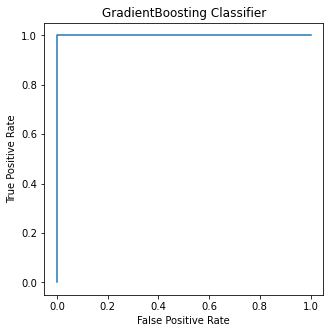

In [58]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('random forest Classifier')
plt.show()

In [55]:
import pickle
filename='heart_deceases.pkl'
pickle.dump(rndf,open(filename,'wb'))